In [1]:
# check if we are using right kernal
import sys;
print(sys.executable)

/Users/irfan/anaconda3/envs/py3.6/bin/python


In [2]:
# import the necessary packages 
import pandas as pd;
import numpy as np;
from matplotlib import pyplot as plt
import seaborn as sns;

! ls "input/"

chrome_history.csv


In [3]:
df = pd.read_csv('input/chrome_history.csv')

In [4]:
df.columns

Index(['id', 'lastVisitTimeLocal', 'lastVisitTimeUTC', 'title', 'url',
       'typedCount', 'visitCount', '[]"_id"', '<ROOT>_id'],
      dtype='object')

In [5]:
df['lastVisitTimeLocal']

0      19/09/2018, 11:54:05
1      19/09/2018, 11:53:45
2      19/09/2018, 11:53:38
3      19/09/2018, 11:53:28
4      19/09/2018, 11:53:12
5      19/09/2018, 11:49:12
6      19/09/2018, 11:48:55
7      19/09/2018, 11:48:32
8      19/09/2018, 11:48:30
9      19/09/2018, 11:47:51
10     19/09/2018, 11:44:21
11     19/09/2018, 11:44:19
12     19/09/2018, 11:44:09
13     19/09/2018, 11:40:24
14     19/09/2018, 11:40:11
15     19/09/2018, 11:38:49
16     19/09/2018, 11:36:49
17     19/09/2018, 11:29:34
18     19/09/2018, 11:29:34
19     19/09/2018, 11:29:09
20     19/09/2018, 11:29:07
21     19/09/2018, 11:26:40
22     19/09/2018, 11:26:37
23     19/09/2018, 11:26:09
24     19/09/2018, 11:25:46
25     19/09/2018, 11:25:43
26     19/09/2018, 11:25:37
27     19/09/2018, 11:25:16
28     19/09/2018, 11:22:46
29     19/09/2018, 11:22:40
               ...         
498    17/09/2018, 12:12:00
499    17/09/2018, 12:11:54
500    17/09/2018, 12:11:47
501    17/09/2018, 12:11:40
502    17/09/2018, 1

In [6]:
df['datetime'] = pd.to_datetime(df['lastVisitTimeLocal'], format="%d/%m/%Y, %H:%M:%S")

In [7]:
time_of_day_stats = df.groupby(df['datetime'].dt.hour)['visitCount'].sum()

In [8]:
time_of_day_stats

datetime
0      21
1       5
6      17
9      11
10    212
11    181
12    155
13     61
14     18
15    199
16    121
17     82
18      9
19     28
20     89
21      8
22      4
23     46
Name: visitCount, dtype: int64

[Text(0,0.5,'visitCount'), Text(0.5,0,'hour of day')]

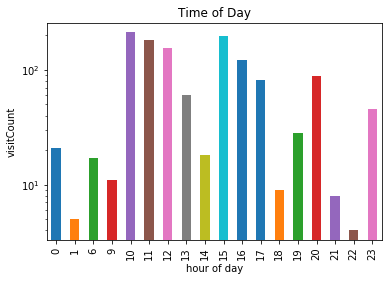

In [9]:
ax = time_of_day_stats.plot(kind='bar', title='Time of Day',logy=True )
ax.set(xlabel='hour of day', ylabel='visitCount')

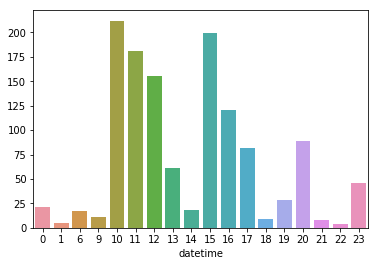

In [19]:
# The above graph using seaborn plot
sns.barplot(x=time_of_day_stats.index, y = time_of_day_stats.values)

In [10]:
datetime_col = df['datetime']

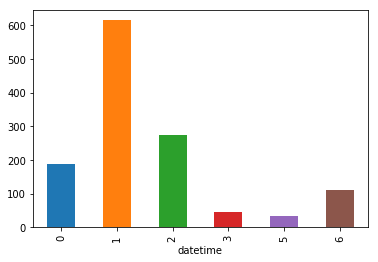

In [11]:
df.groupby(datetime_col.dt.dayofweek)['visitCount'].sum().plot(kind='bar')

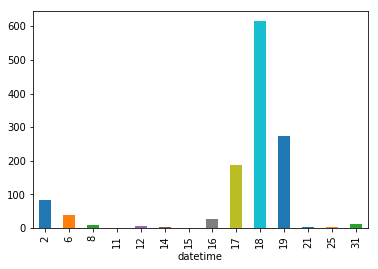

In [12]:
df.groupby(datetime_col.dt.day)['visitCount'].sum().plot(kind='bar')

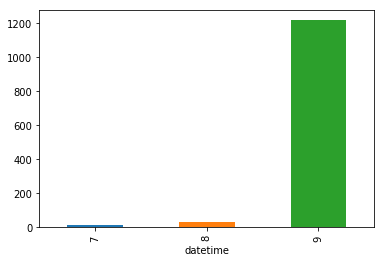

In [13]:
df.groupby(datetime_col.dt.month)['visitCount'].sum().plot(kind='bar')

In [14]:
# Top 20 most visited URLs
df.sort_values('visitCount', ascending=False)[['url', 'visitCount']].head(20)

,url,visitCount
234,https://docs.google.com/spreadsheets/d/1ChM319...,107
61,https://news.google.com/?hl=en-IN&gl=IN&ceid=I...,106
516,https://in.bookmyshow.com/chennai,58
10,https://mail.google.com/mail/u/1/#inbox,31
513,https://netbanking.hdfcbank.com/netbanking/,31
510,http://apsrtconline.in/mobile/,20
517,https://in.bookmyshow.com/,19
521,http://www.apsrtconline.in/oprs-web/avail/serv...,17
270,https://mail.google.com/mail/u/2/#inbox,17
374,https://www.astrology.com/horoscope/daily/canc...,15


In [16]:
# Top 20 most Busiest days
df.sort_values('visitCount', ascending=False)[['datetime', 'visitCount']].head(20)

,datetime,visitCount
234,2018-09-18 15:03:03,107
61,2018-09-19 10:52:15,106
516,2018-09-02 20:57:49,58
10,2018-09-19 11:44:21,31
513,2018-09-06 16:25:29,31
510,2018-09-16 19:04:34,20
517,2018-09-02 20:55:29,19
521,2018-08-18 06:44:03,17
270,2018-09-18 12:54:58,17
374,2018-09-18 10:24:18,15
